In [4]:
# Single game, 3 doors

import numpy as np
import matplotlib.pyplot as plt

# Initialize the prizes:
prize = ['goat', 'goat', 'car']

# Initialize the doors:
doors = np.random.choice(prize, 3, replace = False)
print('The prizes behind each door are: ')
print(doors)
print('   1\t  2\t 3\n')

# The switcher and conservators choose the first door:
first_choice = np.random.randint(0, 3)
print('The contestant chooses the door: ' + str(first_choice+1))

# Picking the winning door:
winning_door = np.where(doors=='car')[0][0]

# Choosing the door opened by the game host:
while(True):
    open_door = np.random.randint(0, 3)
    if (open_door != winning_door and open_door != first_choice): break
print('The game host opens the door: ' + str(open_door+1))

# The contestants choose their respective final doors:
conservator_door = first_choice

while(True): 
    switcher_door = np.random.randint(0, 3)
    if (switcher_door != first_choice and switcher_door != open_door): break
    
while(True):
    newcomer_door = np.random.randint(0, 3)
    if (newcomer_door != open_door): break

# Results:
print('The conservator keeps his door: ' + str(conservator_door+1))
print('The switcher chooses the other door: ' + str(switcher_door+1))
print('The newcomer chooses a door: ' + str(newcomer_door+1) + '\n')

print('And the winner is...')
if(conservator_door == winning_door):
    print('\tConservator WINS!')
    print('\tSwitcher loses...')
else:
    print('\tConservator loses...')
    print('\tswitcher WINS!')
if(newcomer_door == winning_door):
    print('\tNewcomer WINS!')
else:
    print('\tNewcomer loses...')

The prizes behind each door are: 
['car' 'goat' 'goat']
   1	  2	 3

The contestant chooses the door: 1
The game host opens the door: 3
The conservator keeps his door: 1
The switcher chooses the other door: 2
The newcomer chooses a door: 2

And the winner is...
	Conservator WINS!
	Switcher loses...
	Newcomer loses...


Out of 100000 tries:
The conservator wins the car in 33.4% of the tries
The switcher wins the car in 66.6% of the tries
The newcomer wins the car in 50.2% of the tries


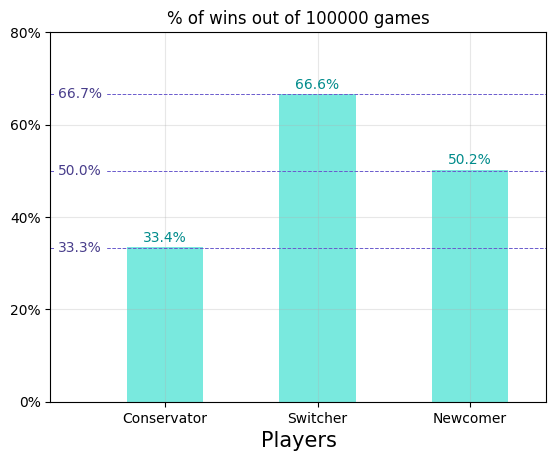

In [5]:
# n games, 3 doors

n = 100000

# Initializing the winning counts for the contestants:
conservator_wins = 0
switcher_wins = 0
newcomer_wins = 0

# Repeating the game n times:
for i in range(n):

    # Initialize the doors:
    doors = np.random.choice(prize, 3, replace = False)

    # The conservator and switcher choose the first door:
    first_choice = np.random.randint(0, 3)

    # Picking the winning door:
    winning_door = np.where(doors=='car')[0][0]

    # Choosing the door opened by the game host:
    while(True):
        open_door = np.random.randint(0, 3)
        if (open_door != winning_door and open_door != first_choice): break
    
    # The contestants choose their respective final doors:
    conservator_door = first_choice

    while(True): 
        switcher_door = np.random.randint(0, 3)
        if (switcher_door != first_choice and switcher_door != open_door): break

    while(True):
        newcomer_door = np.random.randint(0, 3)
        if (newcomer_door != open_door): break

    # Update the scores:
    if(conservator_door == winning_door):
        conservator_wins += 1
    else:
        switcher_wins += 1
        
    if(newcomer_door == winning_door):
        newcomer_wins += 1

# Results:
print("Out of " + str(n) + " tries:")     
print("The conservator wins the car in " + str(round((conservator_wins*100/n), 1)) + "% of the tries")
print("The switcher wins the car in " + str(round((switcher_wins*100/n), 1)) + "% of the tries")
print("The newcomer wins the car in " + str(round((newcomer_wins*100/n), 1)) + "% of the tries")

# Plotting the win percentage for each contestant:
players = np.array(["Conservator", "Switcher", "Newcomer"])
wins_percentage = np.array([conservator_wins*100/n, switcher_wins*100/n, newcomer_wins*100/n])
expected_percentage = np.array([100/3, 200/3, 100/2])

plt.bar(players, wins_percentage, width=0.5, color='turquoise', alpha=0.7)
plt.grid(alpha=0.3)
plt.yticks([0, 20, 40, 60, 80], ['0%', '20%', '40%', '60%', '80%'])
plt.title('% of wins out of ' + str(n) + ' games')
plt.xlabel('Players', fontsize=15)
plt.xlim(-0.75, len(players) - 0.5)

for i, true_value, exp_value in zip(np.arange(len(wins_percentage)), wins_percentage, expected_percentage):
    plt.text(i, true_value + 0.5, f'{true_value:.1f}%', ha='center', va='bottom', color='darkcyan')
    plt.axhline(exp_value, ls='dashed',c='slateblue', linewidth=0.7)
    plt.annotate(str(round(exp_value, 1)) + '%', xy=(-0.75, exp_value), xytext=(-0.7, exp_value), verticalalignment='center', color='darkslateblue', bbox=dict(boxstyle='square', fc='white', edgecolor=(0, 0, 0, 0)))

plt.show()

In [11]:
# Test for the N doors mechanism

N = 10
winning_door = 7
first_choice = 7

print('The winning door is: ' + str(winning_door+1))
print('The first choice is: ' + str(first_choice+1))

all_doors = np.array(range(N)) # Array of indexes for all the doors
print('All possible doors: ' + str(all_doors+1))

all_doors = np.delete(all_doors, winning_door)
print('All possible doors, minus the winning one: ' + str(all_doors+1))

if (first_choice in all_doors): all_doors = np.delete(all_doors, np.where(all_doors == first_choice))
print('All possible doors, minus the winning one and the first choice: ' + str(all_doors+1))

doors_opened = np.random.choice(all_doors, N-2, replace = False)
doors_opened = np.sort(doors_opened)
print('Doors opened by the host: ' + str(doors_opened+1))

mask = np.isin(np.array(range(N)), doors_opened, invert=True)
possible_choices = np.array(range(N))[mask]

print('The contestants can choose between: ' + str(possible_choices +1))

The winning door is: 8
The first choice is: 8
All possible doors: [ 1  2  3  4  5  6  7  8  9 10]
All possible doors, minus the winning one: [ 1  2  3  4  5  6  7  9 10]
All possible doors, minus the winning one and the first choice: [ 1  2  3  4  5  6  7  9 10]
Doors opened by the host: [ 1  2  3  4  5  6  7 10]
The contestants can choose between: [8 9]


In [6]:
# N doors, single game, going to define a function for the choosing mechanism

##########################################################

def host_doors(N_doors, winning_door, first_choice):
    # Returns all the indexes of the doors opened by the host, excluding the winning door and the first contestant choice.
    # If the first choice is the winning door, one random door is left closed.
    # N_doors: int
    # winning_door: int
    # first_choice: int

    all_doors = np.array(range(N_doors)) # Array of indexes for all the doors

    all_doors = np.delete(all_doors, winning_door)

    if (first_choice in all_doors): all_doors = np.delete(all_doors, np.where(all_doors == first_choice))

    doors_opened = np.random.choice(all_doors, N-2, replace = False)
    doors_opened = np.sort(doors_opened)

    return doors_opened

def possible_choices(N_doors, winning_door, first_choice):
    # Returns the indexes of the remaining closed doors.
    # Calls "host_doors" function.
    # N_doors: int
    # winning_door: int
    # first_choice: int

    all_doors = np.array(range(N_doors)) # Array of indexes for all the doors

    doors_opened_by_host = host_doors(N, winning_door, first_choice)

    mask = np.isin(np.array(range(N)), doors_opened_by_host, invert=True)
    closed_doors = np.array(range(N))[mask]

    return closed_doors

##########################################################

N = 3     # Number of doors

# Initialize the prizes behind each door:
prize = []     

for i in range(N-1):
    prize.append('goat')
prize.append('car')     # Now I have an array with N-1 goats and 1 car

doors = np.random.choice(prize, N, replace = False)     # Randomized prizes behind each door

# The switcher and conservators choose the first door:
first_choice = np.random.randint(0, N)

# Picking the winning door:
winning_door = np.where(doors=='car')[0][0]

# The host opens N-2 doors; the contestants can choose between the 2 closed doors remaining:
closed_doors = possible_choices(N, winning_door, first_choice)

#print(closed_doors)

# The contestants choose their respective final doors:
conservator_door = first_choice

second_choice = np.where(closed_doors != first_choice)[0][0]
switcher_door = closed_doors[second_choice]     # The switcher changes his choice

newcomer_door = np.random.choice(closed_doors, 1)[0]

print('The winning door is: ' + str(winning_door+1))

print('The conservator keeps his door: ' + str(conservator_door+1))
print('The switcher chooses the other door: ' + str(switcher_door+1))
print('The newcomer chooses a door: ' + str(newcomer_door+1) + '\n')

print('And the winner is...')
if(conservator_door == winning_door):
    print('\tConservator WINS!')
    print('\tSwitcher loses...')
else:
    print('\tConservator loses...')
    print('\tswitcher WINS!')
if(newcomer_door == winning_door):
    print('\tNewcomer WINS!')
else:
    print('\tNewcomer loses...')

The winning door is: 1
The conservator keeps his door: 3
The switcher chooses the other door: 1
The newcomer chooses a door: 3

And the winner is...
	Conservator loses...
	switcher WINS!
	Newcomer loses...


Out of 100000 tries:
The conservator wins the car in 33.3% of the tries
The switcher wins the car in 66.7% of the tries
The newcomer wins the car in 50.3% of the tries


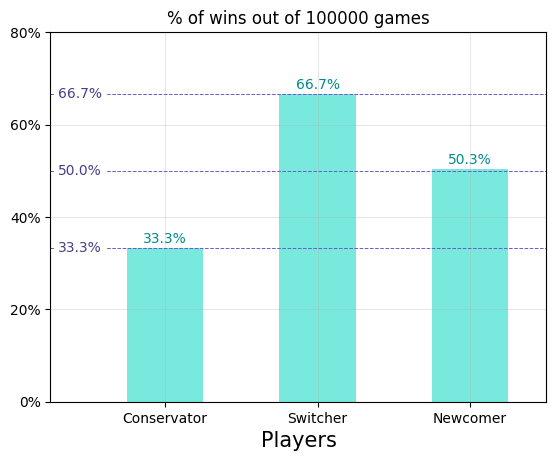

In [7]:
# n games, 3 doors

n = 100000

# Initializing the winning counts for the contestants:
conservator_wins = 0
switcher_wins = 0
newcomer_wins = 0

# Initialize the prizes behind each door:
prize = []     
    
for i in range(N-1):
    prize.append('goat')
prize.append('car')     # Now I have an array with N-1 goats and 1 car

# Repeating the game n times:
for i in range(n):
    N = 3     # Number of doors
    
    doors = np.random.choice(prize, N, replace = False)     # Randomized prizes behind each door
    
    # The switcher and conservators choose the first door:
    first_choice = np.random.randint(0, N)
    
    # Picking the winning door:
    winning_door = np.where(doors=='car')[0][0]
    
    # The host opens N-2 doors; the contestants can choose between the 2 closed doors remaining:
    closed_doors = possible_choices(N, winning_door, first_choice)
    
    #print(closed_doors)
    
    # The contestants choose their respective final doors:
    conservator_door = first_choice
    
    second_choice = np.where(closed_doors != first_choice)[0][0]
    switcher_door = closed_doors[second_choice]     # The switcher changes his choice
    
    newcomer_door = np.random.choice(closed_doors, 1)[0]

    # Update the scores:
    if(conservator_door == winning_door):
        conservator_wins += 1
    else:
        switcher_wins += 1
        
    if(newcomer_door == winning_door):
        newcomer_wins += 1

# Results:
print("Out of " + str(n) + " tries:")     
print("The conservator wins the car in " + str(round((conservator_wins*100/n), 1)) + "% of the tries")
print("The switcher wins the car in " + str(round((switcher_wins*100/n), 1)) + "% of the tries")
print("The newcomer wins the car in " + str(round((newcomer_wins*100/n), 1)) + "% of the tries")

# Plotting the win percentage for each contestant:
players = np.array(["Conservator", "Switcher", "Newcomer"])
wins_percentage = np.array([conservator_wins*100/n, switcher_wins*100/n, newcomer_wins*100/n])
expected_percentage = np.array([100/3, 200/3, 100/2])

plt.bar(players, wins_percentage, width=0.5, color='turquoise', alpha=0.7)
plt.grid(alpha=0.3)
plt.yticks([0, 20, 40, 60, 80], ['0%', '20%', '40%', '60%', '80%'])
plt.title('% of wins out of ' + str(n) + ' games')
plt.xlabel('Players', fontsize=15)
plt.xlim(-0.75, len(players) - 0.5)

for i, true_value, exp_value in zip(np.arange(len(wins_percentage)), wins_percentage, expected_percentage):
    plt.text(i, true_value + 0.5, f'{true_value:.1f}%', ha='center', va='bottom', color='darkcyan')
    plt.axhline(exp_value, ls='dashed',c='slateblue', linewidth=0.7)
    plt.annotate(str(round(exp_value, 1)) + '%', xy=(-0.75, exp_value), xytext=(-0.7, exp_value), verticalalignment='center', color='darkslateblue', bbox=dict(boxstyle='square', fc='white', edgecolor=(0, 0, 0, 0)))

plt.show()

Out of 10000 tries:
The conservator wins the car in 2.6% of the tries
The switcher wins the car in 97.4% of the tries
The newcomer wins the car in 50.7% of the tries


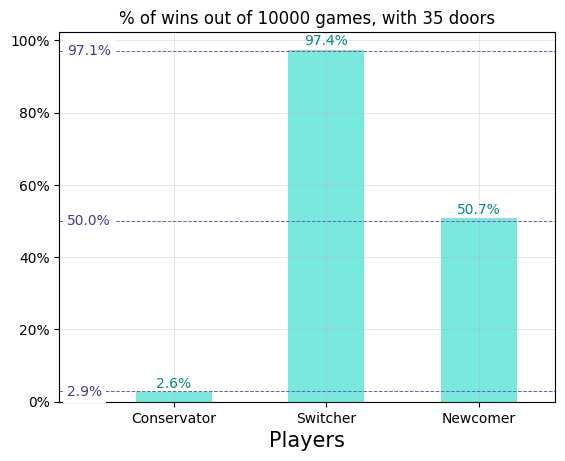

As N increases, I expect the switcher to win more often, while the newcomer always has a 50/50 chance of winning.
In particular, I expect the conservator to have 1 in N_doors chance of winning, and therefore the switcher has P(win) = 1 - 1/N_doors.


In [16]:
# n games, 3 doors

n = 10000     # Number of games
N = 35     # Number of doors

# Initializing the winning counts for the contestants:
conservator_wins = 0
switcher_wins = 0
newcomer_wins = 0

# Initialize the prizes behind each door:
prize = []     
    
for i in range(N-1):
    prize.append('goat')
prize.append('car')     # Now I have an array with N-1 goats and 1 car

# Repeating the game n times:
for i in range(n):
    
    doors = np.random.choice(prize, N, replace = False)     # Randomized prizes behind each door
    
    # The switcher and conservators choose the first door:
    first_choice = np.random.randint(0, N)
    
    # Picking the winning door:
    winning_door = np.where(doors=='car')[0][0]
    
    # The host opens N-2 doors; the contestants can choose between the 2 closed doors remaining:
    closed_doors = possible_choices(N, winning_door, first_choice)
    
    #print(closed_doors)
    
    # The contestants choose their respective final doors:
    conservator_door = first_choice
    
    second_choice = np.where(closed_doors != first_choice)[0][0]
    switcher_door = closed_doors[second_choice]     # The switcher changes his choice
    
    newcomer_door = np.random.choice(closed_doors, 1)[0]

    # Update the scores:
    if(conservator_door == winning_door):
        conservator_wins += 1
    else:
        switcher_wins += 1
        
    if(newcomer_door == winning_door):
        newcomer_wins += 1

# Results:
print("Out of " + str(n) + " tries:")     
print("The conservator wins the car in " + str(round((conservator_wins*100/n), 1)) + "% of the tries")
print("The switcher wins the car in " + str(round((switcher_wins*100/n), 1)) + "% of the tries")
print("The newcomer wins the car in " + str(round((newcomer_wins*100/n), 1)) + "% of the tries")

# Plotting the win percentage for each contestant:
players = np.array(["Conservator", "Switcher", "Newcomer"])
wins_percentage = np.array([conservator_wins*100/n, switcher_wins*100/n, newcomer_wins*100/n])
expected_percentage = np.array([(1/N)*100, ((N-1)/N)*100, 100/2])

plt.bar(players, wins_percentage, width=0.5, color='turquoise', alpha=0.7)
plt.grid(alpha=0.3)
plt.yticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.title('% of wins out of ' + str(n) + ' games, with ' + str(N) + ' doors')
plt.xlabel('Players', fontsize=15)
plt.xlim(-0.75, len(players) - 0.5)

for i, true_value, exp_value in zip(np.arange(len(wins_percentage)), wins_percentage, expected_percentage):
    plt.text(i, true_value + 0.5, f'{true_value:.1f}%', ha='center', va='bottom', color='darkcyan')
    plt.axhline(exp_value, ls='dashed',c='slateblue', linewidth=0.7)
    plt.annotate(str(round(exp_value, 1)) + '%', xy=(-0.75, exp_value), xytext=(-0.7, exp_value), verticalalignment='center', color='darkslateblue', bbox=dict(boxstyle='square', fc='white', edgecolor=(0, 0, 0, 0)))

plt.show()

print('As N increases, I expect the switcher to win more often, while the newcomer always has a 50/50 chance of winning.')
print('In particular, I expect the conservator to have 1 in N_doors chance of winning, and therefore the switcher has P(win) = 1 - 1/N_doors.')

[34.2, 23.5, 20.3, 16.9, 13.6, 13.3, 13.9, 11.1]
[65.8, 76.5, 79.7, 83.1, 86.4, 86.7, 86.1, 88.9]
[49.3, 49.2, 51.2, 50.9, 49.5, 50.3, 51.1, 50.9]


Text(0.5, 0, 'Number of doors')

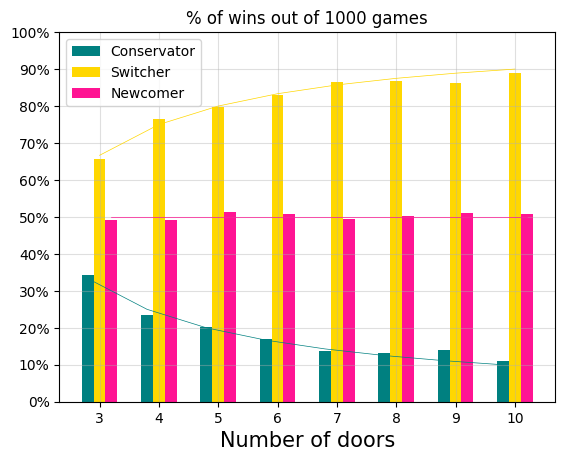

In [8]:
# How the probabilities change when the number N of doors rises.

n = 1000     # Number of games
DOORS = [3, 4, 5, 6, 7, 8, 9, 10]     # Number of doors

P_conservator = []
P_switcher = []
P_newcomer = []

P_exp_conservator = []
P_exp_switcher = []
P_exp_newcomer = []

for N in DOORS:

    # Initializing the winning counts for the contestants:
    conservator_wins = 0
    switcher_wins = 0
    newcomer_wins = 0
    
    # Initialize the prizes behind each door:
    prize = []     
        
    for i in range(N-1):
        prize.append('goat')
    prize.append('car')     # Now I have an array with N-1 goats and 1 car
    
    # Repeating the game n times:
    for i in range(n):
        
        doors = np.random.choice(prize, N, replace = False)     # Randomized prizes behind each door
        
        # The switcher and conservators choose the first door:
        first_choice = np.random.randint(0, N)
        
        # Picking the winning door:
        winning_door = np.where(doors=='car')[0][0]
        
        # The host opens N-2 doors; the contestants can choose between the 2 closed doors remaining:
        closed_doors = possible_choices(N, winning_door, first_choice)
        
        #print(closed_doors)
        
        # The contestants choose their respective final doors:
        conservator_door = first_choice
        
        second_choice = np.where(closed_doors != first_choice)[0][0]
        switcher_door = closed_doors[second_choice]     # The switcher changes his choice
        
        newcomer_door = np.random.choice(closed_doors, 1)[0]

        # Update the scores:
        if(conservator_door == winning_door):
            conservator_wins += 1
        else:
            switcher_wins += 1
            
        if(newcomer_door == winning_door):
            newcomer_wins += 1
    
    P_conservator.append(conservator_wins*100/n)
    P_switcher.append(switcher_wins*100/n)
    P_newcomer.append(newcomer_wins*100/n)

    P_exp_conservator.append((1/N)*100)
    P_exp_switcher.append(((N-1)/N)*100)
    P_exp_newcomer.append(100/2)

print(P_conservator)
print(P_switcher)
print(P_newcomer)



plt.bar([i - 0.2 for i in DOORS], P_conservator, width=0.2, label='Conservator', color='teal')
plt.bar(DOORS, P_switcher, width=0.2, label='Switcher', color='gold')
plt.bar([i + 0.2 for i in DOORS], P_newcomer, width=0.2, label='Newcomer', color='deeppink')
plt.plot([i - 0.2 for i in DOORS], P_exp_conservator, linewidth = 0.5, color = 'teal')
plt.plot(DOORS, P_exp_switcher, linewidth = 0.5, color = 'gold')
plt.plot([i + 0.2 for i in DOORS], P_exp_newcomer, linewidth = 0.5, color = 'deeppink')
plt.legend()
plt.grid(alpha=0.4)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.title('% of wins out of ' + str(n) + ' games')
plt.xlabel('Number of doors', fontsize=15)

[1.97, 0.94, 0.51, 0.08, 0.18, 0.13]
[98.03, 99.06, 99.49, 99.92, 99.82, 99.87]
[49.32, 50.86, 50.28, 50.4, 50.2, 50.44]


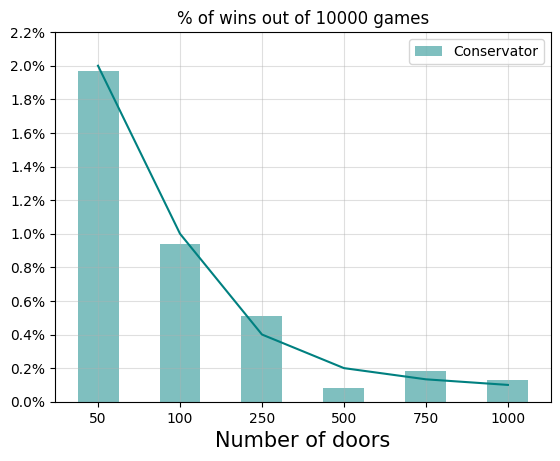

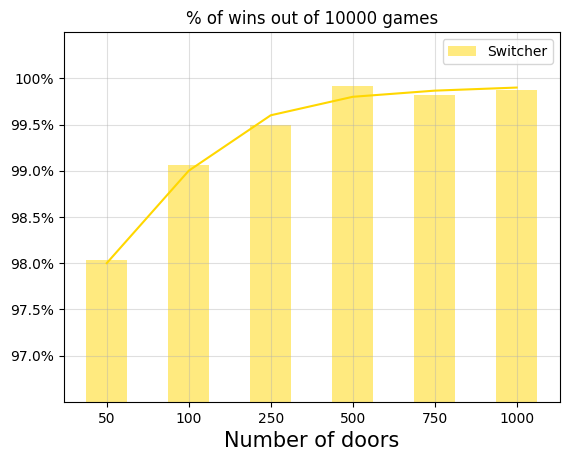

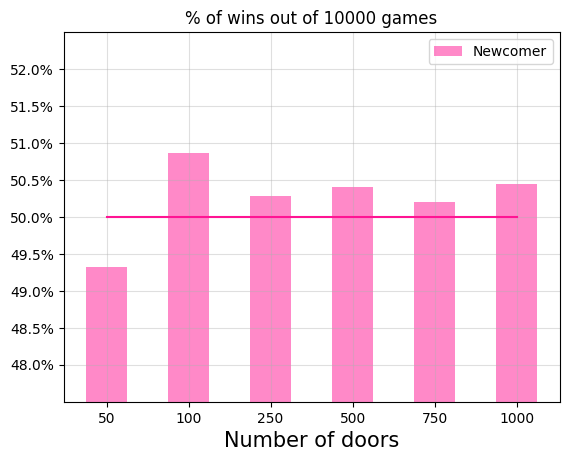

In [29]:
# How the probabilities change when the number N of doors rises.

n = 10000     # Number of games
DOORS = [50, 100, 250, 500, 750, 1000]     # Number of doors

P_conservator = []
P_switcher = []
P_newcomer = []

P_exp_conservator = []
P_exp_switcher = []
P_exp_newcomer = []

for N in DOORS:

    # Initializing the winning counts for the contestants:
    conservator_wins = 0
    switcher_wins = 0
    newcomer_wins = 0
    
    # Initialize the prizes behind each door:
    prize = []     
        
    for i in range(N-1):
        prize.append('goat')
    prize.append('car')     # Now I have an array with N-1 goats and 1 car
    
    # Repeating the game n times:
    for i in range(n):
        
        doors = np.random.choice(prize, N, replace = False)     # Randomized prizes behind each door
        
        # The switcher and conservators choose the first door:
        first_choice = np.random.randint(0, N)
        
        # Picking the winning door:
        winning_door = np.where(doors=='car')[0][0]
        
        # The host opens N-2 doors; the contestants can choose between the 2 closed doors remaining:
        closed_doors = possible_choices(N, winning_door, first_choice)
        
        #print(closed_doors)
        
        # The contestants choose their respective final doors:
        conservator_door = first_choice
        
        second_choice = np.where(closed_doors != first_choice)[0][0]
        switcher_door = closed_doors[second_choice]     # The switcher changes his choice
        
        newcomer_door = np.random.choice(closed_doors, 1)[0]

        # Update the scores:
        if(conservator_door == winning_door):
            conservator_wins += 1
        else:
            switcher_wins += 1
            
        if(newcomer_door == winning_door):
            newcomer_wins += 1
    
    P_conservator.append(conservator_wins*100/n)
    P_switcher.append(switcher_wins*100/n)
    P_newcomer.append(newcomer_wins*100/n)

    P_exp_conservator.append((1/N)*100)
    P_exp_switcher.append(((N-1)/N)*100)
    P_exp_newcomer.append(100/2)

print(P_conservator)
print(P_switcher)
print(P_newcomer)

ticks = np.arange(len(DOORS))

plt.bar(ticks, P_conservator, width=0.5, label='Conservator', color='teal', alpha = 0.5)
plt.plot(ticks, P_exp_conservator, color = 'teal')
plt.legend()
plt.grid(alpha=0.4)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2], ['0.0%', '0.2%', '0.4%', '0.6%', '0.8%', '1.0%', '1.2%', '1.4%', '1.6%', '1.8%', '2.0%', '2.2%'])
plt.xticks(ticks, DOORS)
plt.title('% of wins out of ' + str(n) + ' games')
plt.xlabel('Number of doors', fontsize=15)
plt.legend(fontsize=10)
plt.show()

plt.bar(ticks, P_switcher, width=0.5, label='Switcher', color='gold', alpha = 0.5)
plt.plot(ticks, P_exp_switcher, color = 'gold')
plt.legend()
plt.grid(alpha=0.4)
plt.yticks([97.0, 97.5, 98.0, 98.5, 99.0, 99.5, 100.0], ['97.0%', '97.5%', '98.0%', '98.5%', '99.0%', '99.5%', '100%'])
plt.xticks(ticks, DOORS)
plt.ylim(96.5, 100.5)
plt.title('% of wins out of ' + str(n) + ' games')
plt.xlabel('Number of doors', fontsize=15)
plt.legend(fontsize=10)
plt.show()

plt.bar(ticks, P_newcomer, width=0.5, label='Newcomer', color='deeppink', alpha = 0.5)
plt.plot(ticks, P_exp_newcomer, color = 'deeppink')
plt.legend()
plt.grid(alpha=0.4)
plt.yticks([48.0, 48.5, 49.0, 49.5, 50.0, 50.5, 51.0, 51.5, 52.0], ['48.0%', '48.5%', '49.0%', '49.5%', '50.0%', '50.5%', '51.0%', '51.5%', '52.0%'])
plt.xticks(ticks, DOORS)
plt.ylim(47.5, 52.5)
plt.title('% of wins out of ' + str(n) + ' games')
plt.xlabel('Number of doors', fontsize=15)
plt.legend(fontsize=10)
plt.show()

In [ ]:
# Guarda come cambiano le probabilità al crescere di N
# Guarda come cambiano le probabilità al crescere di n
# Guarda cosa succede se l'host apre meno porte
# Metti giù le cose per bene nella versione finale
# PER I RANGE DEGLI YTICKS, fai qualcosa di sensato, tipo range(altezza massima), e metti i numerelli in alto alle barre